<a href="https://colab.research.google.com/github/cmarqueztecnosylva/3MAIR_Algoritmos_Oprimizacion_shared/blob/main/JuanCarlosMarquezMarques_Actividad_v5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Algoritmos de Optimizacion - Actividad Evaluable**
**Profesor: Raul Reyero**

**Alumno: Juan Carlos Márquez Marqués**

URL Google Collab: [AG2]()

URL GitHub: [link text]()

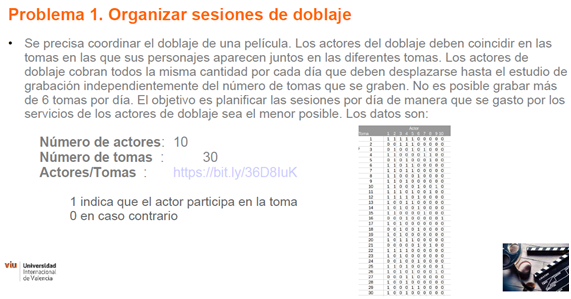

## Análisis inicial del problema

*   Problema de Minimización; Minimizar Costes
*   Meter el máximo número dobladores por Sesión de doblaje
*   Restricción: máximo 6 tomas por Sesión
*   Se puede usar el total de dobladores por toma como el peso por el que buscar
*   Una vez encontradas 6 tomas, si el total máximo no llega a 6 tomas, aun se puede incluir alguna otra Toma buscando tomas que completen las tomas del doblador con más tomas hasta == 6
*   Revisando los datos, parece que lo mejor es ordenar las tomas por peso, así evitaremos complejidad en el algorimo


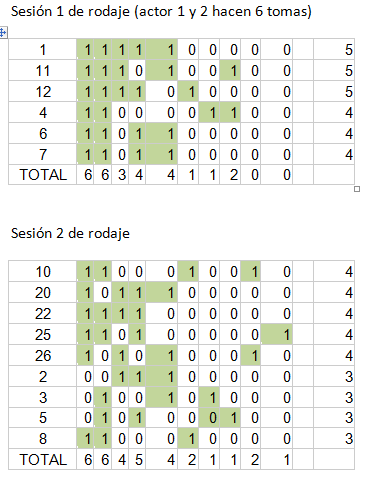	


El sumatorio de actores lo mantendremos en un array bidimiensional llamado JORNADAS.

Las tomas correspondientes a las jornadas sumadas en JORNADAS, las mantendremos en un array llamado TOMAS, de una dimensión, ya que las tomas incluidas por jornada pueden ser desiguales entre jornadas, lo que obliga a marcar la división de tomas por jornada con un indicador especial. Se verá en el código fuente, pero adelanto que le marcador es una triple almoadilla: ###




In [ ]:
##########################################################################
# Organización de sesiones de doblaje
##########################################################################
import numpy as np
#import time

In [ ]:
# Matriz donde cada fila es una Toma y cada 
# columna es el actor que interviene en la toma
# está basado en la matriz: 
# https://docs.google.com/spreadsheets/d/1Ipn6IrbQP4ax8zOnivdBIw2lN0JISkJG4fXndYd27U0/edit#gid=0
#
# Se trata de una matriz de 30 (Tomas) x 10 (actores), más
# una columna extra, que es el total de actores que
# intervienen en la toma; columna que vamos a utilizar 
# a modo de como peso
TOMA_NUMACTOR = [[1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 5],
                  [2, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 3],
                  [3, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 3],
                  [4, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 4],
                  [5, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 3],
                  [6, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 4],
                  [7, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 4],
                  [8, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 3],
                  [9, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 3],
                  [10, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 4],
                  [11, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 5],
                  [12, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 5],
                  [13, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 3],
                  [14, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 3],
                  [15, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 3],
                  [16, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 2],
                  [17, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2],
                  [18, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 2],
                  [19, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2],
                  [20, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 4],
                  [21, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 2],
                  [22, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 4],
                  [23, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2],
                  [24, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 2],
                  [25, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 4],
                  [26, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 4],
                  [27, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 2],
                  [28, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2],
                  [29, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 3],
                  [30, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2]]

# convierto la lista a numpy matrix para poder
# usar slices con mayor eficacia                 
TOMA_NUMACTOR = np.array(TOMA_NUMACTOR)				
#print(TOMA_NUMACTOR)	

# Pruebas slices sobre la matriz:
print(type(TOMA_NUMACTOR))
rows = len(TOMA_NUMACTOR)
print('DEBUG rows: ', rows)
columns = len(TOMA_NUMACTOR[0])
print('DEBUG columns: ', columns)
print('DEBUG Fila 4: ',TOMA_NUMACTOR[3][:])	
print('DEBUG Columna de Tomas ',TOMA_NUMACTOR[:,0])	
print('DEBUG Columna de Pesos ',TOMA_NUMACTOR[:,11])	
print('DEBUG Suma de Pesos ',TOMA_NUMACTOR[:,11].sum())	
print('DEBUG Columna 12, elemento ultimo: ',TOMA_NUMACTOR[29,11])	

<class 'numpy.ndarray'>
DEBUG rows:  30
DEBUG columns:  12
DEBUG Fila 4:  [4 1 1 0 0 0 0 1 1 0 0 4]
DEBUG Columna de Tomas  [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30]
DEBUG Columna de Pesos  [5 3 3 4 3 4 4 3 3 4 5 5 3 3 3 2 2 2 2 4 2 4 2 2 4 4 2 2 3 2]
DEBUG Suma de Pesos  94
DEBUG Columna 12, elemento ultimo:  2


In [ ]:
##########################################################################
# Método de división de la matriz que forma parte de la ordenación
# quicksort 
#
# my_matrix: Matriz a ordenar
# min_row_index: indice inferior de la fila
# max_row_index: indice superior de la fila
# working_col: columna sobre la que se ejecuta la ordenación
##########################################################################
def divide_array(my_matrix, min_row_index, max_row_index, working_col):
  
  ##print('DEBUG: col pesos: ',my_matrix[min_row_index : max_row_index, working_col])

  row_pivot = min_row_index - 1
  pivot = my_matrix[max_row_index, working_col]

  ##print('DEBUG: row_pivot: ',row_pivot)
  ##print('DEBUG: pivot: ',pivot)

  for row in range(min_row_index, max_row_index):
    if my_matrix[row, working_col] > pivot:
      row_pivot = row_pivot + 1

      # Intercambio de filas (la fila entera)
      aux_array = np.copy(my_matrix[row][:])
      my_matrix[row][:] = np.copy(my_matrix[row_pivot][:])
      my_matrix[row_pivot][:] = np.copy(aux_array)
    #Endif
  #Endfor

  # Intercambio 
  aux_array = np.copy(my_matrix[max_row_index][:])
  my_matrix[max_row_index][:] = np.copy(my_matrix[row_pivot+1][:])
  my_matrix[row_pivot+1][:] = np.copy(aux_array)
  
  # 
  return ( row_pivot+1 ), my_matrix 


##########################################################################
# Método de ordenación quicksort modificado para ordenar una matriz
# en función de una columna
#
# my_matrix: Matriz a ordenar
# min_row_index: indice inferior de la fila
# max_row_index: indice superior de la fila
# working_col: columna sobre la que se ejecuta la ordenación
##########################################################################
def quick_sort_for_matrix_rows(my_matrix, min_row_index
                               , max_row_index, working_col):
  
  if min_row_index < max_row_index:   
    # 
    split_from, my_matrix = divide_array(my_matrix,min_row_index,max_row_index, working_col) 

    ##print('DEBUG: split_from ',split_from)

    # Dividimos el array de pesos en 2
    ##print('DEBUG: qs1: ',my_matrix[min_row_index : split_from-1, working_col])
    my_matrix = quick_sort_for_matrix_rows(my_matrix, min_row_index, split_from-1, working_col) 
    ##print('DEBUG: qs1: ',my_matrix[split_from+1 : max_row_index, working_col])
    my_matrix = quick_sort_for_matrix_rows(my_matrix, split_from+1, max_row_index, working_col) 

  return my_matrix


##########################################################################
# Cuerpo principal del programa
##########################################################################
rows = len(TOMA_NUMACTOR)
columns = len(TOMA_NUMACTOR[0])

#Llamada a la ordenación
my_matrix = quick_sort_for_matrix_rows(TOMA_NUMACTOR, 0, rows - 1, columns -1)     

print(my_matrix)
print('DEBUG Suma de Pesos ',TOMA_NUMACTOR[:,11].sum())	

[[12  1  1  1  1  0  1  0  0  0  0  5]
 [ 1  1  1  1  1  1  0  0  0  0  0  5]
 [11  1  1  1  0  1  0  0  1  0  0  5]
 [26  1  0  1  0  1  0  0  0  1  0  4]
 [ 7  1  1  0  1  1  0  0  0  0  0  4]
 [10  1  1  0  0  0  1  0  0  1  0  4]
 [ 4  1  1  0  0  0  0  1  1  0  0  4]
 [ 6  1  1  0  1  1  0  0  0  0  0  4]
 [20  1  0  1  1  1  0  0  0  0  0  4]
 [22  1  1  1  1  0  0  0  0  0  0  4]
 [25  1  1  0  1  0  0  0  0  0  1  4]
 [29  1  0  0  0  1  1  0  0  0  0  3]
 [ 2  0  0  1  1  1  0  0  0  0  0  3]
 [13  1  0  0  1  1  0  0  0  0  0  3]
 [14  1  0  1  0  0  1  0  0  0  0  3]
 [15  1  1  0  0  0  0  1  0  0  0  3]
 [ 8  1  1  0  0  0  1  0  0  0  0  3]
 [ 9  1  1  0  1  0  0  0  0  0  0  3]
 [ 5  0  1  0  1  0  0  0  1  0  0  3]
 [ 3  0  1  0  0  1  0  1  0  0  0  3]
 [30  1  0  0  1  0  0  0  0  0  0  2]
 [21  0  0  0  0  0  1  0  1  0  0  2]
 [17  1  0  1  0  0  0  0  0  0  0  2]
 [23  1  0  1  0  0  0  0  0  0  0  2]
 [24  0  0  1  0  0  1  0  0  0  0  2]
 [18  0  0  1  0  0  1  0

In [ ]:
##########################################################################
# Metodo que forma parte de la busqueda quicksort, y que hace búsquedas
# parciales
##########################################################################
def divide_array(my_list, min_index, max_index, item2find):
  found_index = -1

  i_pivot = min_index - 1
  pivot = my_list[max_index]

  for j in range(min_index, max_index):
    if my_list[j] == item2find:
      i_pivot = i_pivot + 1
      
      # Busqueda
      #print('item buscado:', my_list[j])
      found_index = j
      break;
    #Endif
  #Endfor

  return ( i_pivot+1 ),  found_index


##########################################################################
# Método de búsqueda Quicksort, basado en la ordenación Quicksort
##########################################################################
def my_quick_find(my_list, min_index, max_index, item2find):
  found_index = -1
  _pivot = int(max_index / 2)
  pivot = my_list[max_index]
  #print('DEBUG: my_list ',my_list)

  if min_index < max_index:   
    # split_from es el indice que va a dividir el array en las
    # siguientes iteracioes
    split_from, found_index = divide_array(my_list,min_index,max_index, item2find) 

    #print('DEBUG: split_from ',split_from)

    # procesamos el array en dos partes diferentes mediante recursividad
    if found_index == -1:       
      my_quick_find(my_list, min_index, split_from-1, item2find) 
      my_quick_find(my_list, split_from+1, max_index, item2find) 
    #endif
  #endif

  return found_index

In [ ]:

##########################################################################
# Método para la creación de las jornadas de trabajo en función
# de las tomas (movieshots)
#
# movieshots_matrix
##########################################################################
def calc_workingdays_from_movieshots(movieshots_matrix, max_tomas):

  # Obtengo tamaño de la matriz en sus dos dimensiones
  rows = len(movieshots_matrix)
  columns = len(movieshots_matrix[0])

  # Lista que mantendra total tomas X actor-jornada
  width = columns -2# mismas columnas que el original, menos la de num toma y peso
  JORNADAS = np.zeros([0, width], dtype=int)
  #Inicializacion de el array auxiliar para la suma de tomas en una jornada
  JORNADAS_AUX = np.zeros([1, width], dtype=int)  

  # Lista que mantendra las tomas incluidas en la jornada
  TOMAS = [] #np.zeros([1, 1], dtype=int)
  TOMAS_AUX = []

  # Cogemos el peso de la primera fila para
  # usarlo como referencia
  weight = movieshots_matrix[0, columns-1]
  ##print('DEBUG weight: ', weight)

  for row in range(0, rows):
    #print(movieshots_matrix[row, :])

    #buscamos en el array, el maximo de tomas por jornada
    founditem_index = my_quick_find(JORNADAS_AUX[0], 0, len(JORNADAS_AUX[0]) - 1, max_tomas)
    if founditem_index != -1:
      # Añado el sumatorio de tomas a las jornadas
      JORNADAS = np.append(JORNADAS, JORNADAS_AUX, axis=0)

      #Inicializacion de el array auxiliar para la suma de tomas en una jornada
      JORNADAS_AUX = np.zeros([1, width], dtype=int)

      #
      TOMAS_AUX.append('###') # Marco el cambio de tomas por jornada 
      TOMAS = np.append(TOMAS, TOMAS_AUX) # añado las tomas al array final

      # Inicializo el array auxiliar para las siguientes tomas
      TOMAS_AUX = []
    else:
      #
      TOMAS_AUX.append(int(movieshots_matrix[row, 0]))
    #Endif

    for col in range(1, columns - 1): #evito la primera y ultima columna
      # sumamos 
      JORNADAS_AUX[0,col -1] = JORNADAS_AUX[0,col -1] + movieshots_matrix[row, col]
    #Endfor
  #Endfor

  # Adición del conteo de la última jornada
  JORNADAS = np.append(JORNADAS, JORNADAS_AUX, axis=0)
  del JORNADAS_AUX

  # Adición del número de cada toma de la última jornada
  TOMAS = np.append(TOMAS, TOMAS_AUX)
  del TOMAS_AUX

  return JORNADAS, TOMAS


##########################################################################
# Método encargado de mostrar la información de manera amigable
##########################################################################
def show_pretty_information(jornadas, tomas):

  total = 0
  i = 0 # indice para recorrer las tomas cuando proceda

  # Recorremos las jornadas
  for row in range(0, len(jornadas)):
    print('\n\n   Día ',row + 1, ' de doblaje')
    print('se realizarán las tomas: ', end='')

    # While para enseñar las tomas
    more_movieshots = True
    while more_movieshots:
      print(tomas[i],',', end='')
      i=i+1
      if i == len(tomas) or tomas[i] == '###':
        more_movieshots = False
        print('')
        i=i+1
      #endif
    #endwhile

    # for que recorre la cantidad de tomas/actor de la jornada
    print('Donde las tomas se repartirán de la siguiente manera:')
    for col in range(0, len(jornadas[row])):
      print('Actor ', col +1,': ', jornadas[row,col], ' tomas')
      total = total + jornadas[row,col]
    #endfor
  #endfor

  print('\nCon un total de ',total,' tomas')

  return


##########################################################################
# Cuerpo principal del programa
##########################################################################

# El máximo de tomas permitidas por jornada laboral
MAX_TOMAS_DIARIAS = 6

#Llamada a la ordenación
jornadas, tomas = calc_workingdays_from_movieshots(TOMA_NUMACTOR, MAX_TOMAS_DIARIAS)     

#print("\n JORNADAS")
#print(jornadas)

#print("\n TOMAS")
#print(tomas)  

# Presentamos la información
show_pretty_information(jornadas, tomas)





   Día  1  de doblaje
se realizarán las tomas: 12 ,1 ,11 ,26 ,7 ,10 ,
Donde las tomas se repartirán de la siguiente manera:
Actor  1 :  6  tomas
Actor  2 :  5  tomas
Actor  3 :  4  tomas
Actor  4 :  3  tomas
Actor  5 :  4  tomas
Actor  6 :  2  tomas
Actor  7 :  0  tomas
Actor  8 :  1  tomas
Actor  9 :  2  tomas
Actor  10 :  0  tomas


   Día  2  de doblaje
se realizarán las tomas: 6 ,20 ,22 ,25 ,29 ,
Donde las tomas se repartirán de la siguiente manera:
Actor  1 :  6  tomas
Actor  2 :  4  tomas
Actor  3 :  2  tomas
Actor  4 :  4  tomas
Actor  5 :  3  tomas
Actor  6 :  1  tomas
Actor  7 :  1  tomas
Actor  8 :  1  tomas
Actor  9 :  0  tomas
Actor  10 :  1  tomas


   Día  3  de doblaje
se realizarán las tomas: 13 ,14 ,15 ,8 ,9 ,5 ,3 ,30 ,
Donde las tomas se repartirán de la siguiente manera:
Actor  1 :  6  tomas
Actor  2 :  5  tomas
Actor  3 :  2  tomas
Actor  4 :  5  tomas
Actor  5 :  3  tomas
Actor  6 :  2  tomas
Actor  7 :  2  tomas
Actor  8 :  1  tomas
Actor  9 :  0  tomas
Actor  1

(*)¿Cuantas posibilidades hay sin tener en cuenta las restricciones?<br>



¿Cuantas posibilidades hay teniendo en cuenta todas las restricciones.

Respuesta

Modelo para el espacio de soluciones<br>
(*) ¿Cual es la estructura de datos que mejor se adapta al problema? Argumentalo.(Es posible que hayas elegido una al principio y veas la necesidad de cambiar, arguentalo)

Respuesta

Según el modelo para el espacio de soluciones<br>
(*)¿Cual es la función objetivo?

(*)¿Es un problema de maximización o minimización?

Respuesta

Diseña un algoritmo para resolver el problema por fuerza bruta

Respuesta

Calcula la complejidad del algoritmo por fuerza bruta

Respuesta

(*)Diseña un algoritmo que mejore la complejidad del algortimo por fuerza bruta. Argumenta porque crees que mejora el algoritmo por fuerza bruta

Respuesta

(*)Calcula la complejidad del algoritmo

Respuesta

Según el problema (y tenga sentido), diseña un juego de datos de entrada aleatorios

Respuesta

Aplica el algoritmo al juego de datos generado

Respuesta

Enumera las referencias que has utilizado(si ha sido necesario) para llevar a cabo el trabajo

Respuesta

Describe brevemente las lineas de como crees que es posible avanzar en el estudio del problema. Ten en cuenta incluso posibles variaciones del problema y/o variaciones al alza del tamaño

Respuesta